In [1]:
import numpy as np
import pandas as pd
import scipy.sparse
from Bio import SeqIO
import matplotlib.pyplot as plt

In [2]:
import sympy

In [3]:
BIOMARKER_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'

In [82]:
sbb = 'sbb1'
biomarker_names_file = BIOMARKER_DIR + 'results/generate_biomarkers/biomarker_names_%s_obesity.txt' % sbb
sample_vs_biomarker_file = BIOMARKER_DIR + 'results/generate_biomarkers/sample_vs_biomarker_%s_obesity.npz' % sbb
asv_vs_biomarker_file = BIOMARKER_DIR + 'results/generate_biomarkers/asv_vs_biomarker_%s_obesity.npz' % sbb
sample_vs_asv_file = BIOMARKER_DIR + 'data/autism/sample_vs_asv.tsv'
seqs_aligned_file = BIOMARKER_DIR + 'data/autism/seqs_aligned_rdp.fa'
asv_vs_biomarker_sbb1_file = BIOMARKER_DIR + 'results/generate_biomarkers/asv_vs_biomarker_sbb1_obesity.npz'


In [83]:
with open (biomarker_names_file) as f:
    biomarker_names = [l.replace('\n', '') for l in f.readlines()]
    
with open (biomarker_names_file.replace('sbb3', 'sbb1')) as f:
    biomarker_names_sbb1 = [l.replace('\n', '') for l in f.readlines()]

sample_vs_biomarker  = scipy.sparse.load_npz(sample_vs_biomarker_file)
asv_vs_biomarker  = scipy.sparse.load_npz(asv_vs_biomarker_file)
asv_vs_biomarker_sbb1  = scipy.sparse.load_npz(asv_vs_biomarker_sbb1_file)
sample_vs_asv = pd.read_table(sample_vs_asv_file)
seqs_aligned = [r for r in SeqIO.parse(seqs_aligned_file, 'fasta')][:-1]

asv_vs_biomarker_df = pd.DataFrame(asv_vs_biomarker.todense())
asv_vs_biomarker_df.columns = biomarker_names


In [182]:
np.sum(asv_vs_biomarker_df.mean()<.5)

437

In [217]:
df = asv_vs_biomarker_df[asv_vs_biomarker_df.columns[(asv_vs_biomarker_df.mean()>.1) & (asv_vs_biomarker_df.mean()<.9)]]
jaccard_df = pd.DataFrame([[jaccard(df[df.columns[i]], df[df.columns[j]]) if i > j else np.nan 
                            for i in range(np.shape(df)[1])] 
                           for j in range(np.shape(df)[1])])
new_df = jaccard_df
min_val = np.min(new_df.min(axis=0))
min_idx = new_df.columns[np.argmin(new_df.min(axis=0))]
while (min_val < .1) or (min_val>.9):
    new_df = new_df.drop(min_idx, axis=0)
    new_df = new_df.drop(min_idx, axis=1)
    min_val = np.min(new_df.min(axis=0))
    min_idx = new_df.columns[np.argmin(new_df.min(axis=0))]
columns = df.columns[new_df.columns]
sum((df[columns].mean()>.1) & (df[columns].mean()<.9))

In [218]:
new_df = jaccard_df
min_val = np.min(new_df.min(axis=0))
min_idx = new_df.columns[np.argmin(new_df.min(axis=0))]
while (min_val < .1) or (min_val>.9):
    new_df = new_df.drop(min_idx, axis=0)
    new_df = new_df.drop(min_idx, axis=1)
    min_val = np.min(new_df.min(axis=0))
    min_idx = new_df.columns[np.argmin(new_df.min(axis=0))]
columns = df.columns[new_df.columns]
sum((df[columns].mean()>.1) & (df[columns].mean()<.9))

149

In [197]:
from sklearn.metrics import mutual_info_score 
from sklearn.metrics import jaccard_score


ImportError: cannot import name 'jaccard_score'

In [133]:
from scipy.spatial.distance import jaccard

In [67]:
mutual_info_score([1,1,0,1],[1,0,0,1])

0.21576155433883565

In [ ]:
MI = [[mutual_info_score(asv_vs_biomarker_df[asv_vs_biomarker_df.columns[i]], asv_vs_biomarker_df[asv_vs_biomarker_df.columns[j]]) for i in range(100)] for j in range(100)]

(array([39., 18.,  9.,  3.,  6.,  5.,  2.,  6.,  3.,  9.]),
 array([0.00226249, 0.07134813, 0.14043377, 0.20951941, 0.27860505,
        0.34769069, 0.41677633, 0.48586197, 0.55494761, 0.62403325,
        0.69311889]),
 <BarContainer object of 10 artists>)

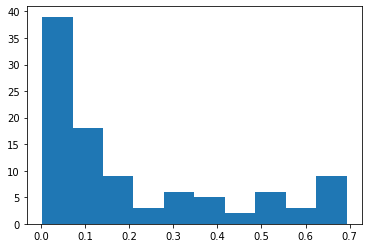

In [189]:
plt.hist(pd.DataFrame(MI).max())

In [136]:
jaccard_df = pd.DataFrame([[jaccard(asv_vs_biomarker_df[asv_vs_biomarker_df.columns[i]], asv_vs_biomarker_df[asv_vs_biomarker_df.columns[j]]) 
                            for i in range(np.shape(asv_vs_biomarker_df)[1])] 
                           for j in range(np.shape(asv_vs_biomarker_df)[1])])

In [142]:
for i in range(len(jaccard_df)):
    jaccard_df.loc[i,i] = np.nan

In [153]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,584,585,586,587,588,589,590,591,592,593
0,NaN,1.000000,0.757812,1.000000,0.994350,0.142857,0.138889,0.877470,0.860360,0.988889,...,0.325581,0.387755,0.032258,0.125000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000
1,1.000000,NaN,0.468750,0.805195,0.603896,1.000000,1.000000,0.741176,0.971631,0.807692,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.968750,0.975207,0.936170,0.940828
2,0.757812,0.468750,NaN,0.848485,0.505435,0.763359,0.766917,0.505882,0.874598,0.766667,...,0.792857,0.794521,0.765625,0.782946,1.000000,1.0,0.978723,0.983425,0.961039,0.956332
3,1.000000,0.805195,0.848485,NaN,0.836735,1.000000,1.000000,0.905138,1.000000,0.976923,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.988506,1.000000,1.000000,1.000000
4,0.994350,0.603896,0.505435,0.836735,NaN,0.977401,0.994505,0.431373,0.921053,0.658621,...,0.994652,0.994845,0.994318,0.994286,1.000000,1.0,0.980676,0.985000,0.982955,0.968000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000
590,1.000000,0.968750,0.978723,0.988506,0.980676,1.000000,1.000000,0.987220,0.996491,0.990099,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,NaN,1.000000,1.000000,1.000000
591,1.000000,0.975207,0.983425,1.000000,0.985000,1.000000,0.989011,0.983553,0.989091,0.979452,...,1.000000,1.000000,1.000000,0.988095,1.000000,1.0,1.000000,NaN,0.988506,0.981707
592,1.000000,0.936170,0.961039,1.000000,0.982955,1.000000,1.000000,0.978495,0.971660,0.973783,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.988506,NaN,0.777778


In [178]:
new_df = jaccard_df
min_val = 0
while (min_val < .1) or (min_val>.9):
    new_df = new_df.drop(min_idx, axis=0)
    new_df = new_df.drop(min_idx, axis=1)
    min_val = np.min(new_df.min(axis=0))
    min_idx = new_df.columns[np.argmin(new_df.min(axis=0))]

In [177]:
min_val

0.20175724048161406

In [84]:
np.linalg.matrix_rank(asv_vs_biomarker_df)

570

In [93]:
asv_vs_biomarker_df = (asv_vs_biomarker_df.mean()>.1) & (asv_vs_biomarker_df.mean()<.9))

170

In [96]:
170**2

28900

In [28]:
test.rref()[1]

KeyboardInterrupt: 

In [173]:
q, r =np.linalg.qr(asv_vs_biomarker_df, 'complete')

In [2]:
%%bash
ml py-sympy/1.1.1_py36

In [3]:
from sympy import *

ModuleNotFoundError: No module named 'sympy'

In [146]:
np.shape(q)

(12363, 594)

In [72]:
df = 1*asv_vs_biomarker_df.copy()
df =  df.apply(axis=0, func=lambda x: x/np.sqrt(sum(x**2)))


In [73]:
(df**2).sum()

487_A       1.0
489_A       1.0
490_A       1.0
496_A       1.0
497_A       1.0
           ... 
1779_gap    1.0
1780_gap    1.0
1783_gap    1.0
1786_gap    1.0
1792_gap    1.0
Length: 644, dtype: float64

In [127]:
df = 1*asv_vs_biomarker_df.copy()
df =  df.apply(axis=0, func=lambda x: x/np.sqrt(sum(x**2)))
df =  df.apply(axis=0, func=lambda x: x-np.mean(x))
df_diff = df.copy()
orig_var = sum(np.var(df))
variances = []
cols = list(df.columns)
#for i in range(1):
for i in range(1):
    #cols = cols + [df.columns[np.argmax(np.var(df_diff))]]
    vector = np.matrix(1*df[cols])
    reconstructed = np.matmul(df.transpose(),np.matmul(vector, vector.transpose())).transpose()
    df_diff = df-reconstructed
    print(abs(df_diff).sum().sum())
    variances = variances + [sum(np.var(reconstructed))/orig_var]

132155.72470427255


In [134]:
np.matmul(vector, vector.transpose())

matrix([[ 1.56560982e-01, -3.35051910e-03,  4.69460451e-03, ...,
         -6.70331116e-03,  3.11566875e-02,  8.61659864e-04],
        [-3.35051910e-03,  1.40234598e-01, -5.73600516e-03, ...,
          1.32823475e-02, -3.01656237e-03,  1.94647904e-04],
        [ 4.69460451e-03, -5.73600516e-03,  5.23151779e-02, ...,
         -2.70751989e-03,  1.37269259e-02, -7.38686029e-04],
        ...,
        [-6.70331116e-03,  1.32823475e-02, -2.70751989e-03, ...,
          2.04129175e-01, -1.01809276e-03, -6.32837913e-03],
        [ 3.11566875e-02, -3.01656237e-03,  1.37269259e-02, ...,
         -1.01809276e-03,  6.31172403e-02, -2.01127269e-03],
        [ 8.61659864e-04,  1.94647904e-04, -7.38686029e-04, ...,
         -6.32837913e-03, -2.01127269e-03,  4.42152475e-02]])

In [133]:
corr_test

,487_A,489_A,490_A,496_A,497_A,502_A,503_A,505_A,506_A,513_A,...,1386_gap,1387_gap,1395_gap,1776_gap,1778_gap,1779_gap,1780_gap,1783_gap,1786_gap,1792_gap
487_A,1.000000,0.074145,0.028824,-0.198601,-0.035660,-0.017916,0.144457,-0.014231,0.010403,-0.010745,...,0.005366,0.009683,0.007592,0.006000,0.005366,0.005366,0.009683,0.009302,0.006000,0.002682
489_A,0.074145,1.000000,0.163600,0.122290,-0.014152,0.073493,-0.125862,-0.051674,0.074010,-0.003669,...,0.038178,0.068886,0.054013,0.042689,0.038178,0.038178,0.068886,0.066177,0.042689,0.019084
490_A,0.028824,0.163600,1.000000,-0.063439,0.019825,0.288264,0.100936,0.010862,0.360913,0.008202,...,0.186179,0.335927,0.263397,0.208174,0.186179,0.186179,0.335927,0.322718,0.208174,0.093063
496_A,-0.198601,0.122290,-0.063439,1.000000,0.130111,0.056887,-0.420965,0.029751,0.075503,0.009907,...,0.038949,0.070276,0.055103,0.043550,0.038949,0.038949,0.070276,0.067513,0.043550,0.019469
497_A,-0.035660,-0.014152,0.019825,0.130111,1.000000,-0.004073,0.222185,0.295944,0.009824,-0.010147,...,0.005068,0.009144,0.007170,0.005666,0.005068,0.005068,0.009144,0.008784,0.005666,0.002533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779_gap,0.005366,0.038178,0.186179,0.038949,0.005068,0.416273,0.021318,0.002022,0.515856,0.001527,...,0.749809,0.415324,0.706837,0.894342,0.749809,1.000000,0.554224,0.432352,0.446745,0.499857
1780_gap,0.009683,0.068886,0.335927,0.070276,0.009144,0.751091,0.038465,0.003649,0.930772,0.002755,...,0.415324,0.922886,0.685836,0.495453,0.415324,0.554224,1.000000,0.960677,0.619700,0.277033
1783_gap,0.009302,0.066177,0.322718,0.067513,0.008784,0.721556,0.036953,0.003506,0.894171,0.002647,...,0.287794,0.880422,0.611671,0.386449,0.287794,0.432352,0.960677,1.000000,0.645066,0.288372
1786_gap,0.006000,0.042689,0.208174,0.043550,0.005666,0.465452,0.023837,0.002261,0.576800,0.001707,...,0.446745,0.619700,0.790343,0.399428,0.222946,0.446745,0.619700,0.645066,1.000000,0.447043


In [93]:
cols

['611_G']

In [37]:
test = df.apply(axis=1, func=lambda x: x/np.sqrt(sum(x**2)))

In [75]:
cols = []
cols = cols + [df.columns[np.argmax(np.var(df_diff))]]
vector = np.matrix(1*df[cols])
reconstructed = np.matmul(df.transpose(),np.matmul(vector, vector.transpose()))
#reconstructed = np.matmul(vector[:,np.newaxis], projection[np.newaxis,:])
#df = df-reconstructed
#variances = variances + [(sum(np.var(df)))/orig_var]

In [76]:
cols

['611_G']

In [247]:
asv_vs_biomarker_df[col]

0       False
1       False
2       False
3       False
4        True
        ...  
5244    False
5245     True
5246     True
5247     True
5248    False
Name: 552_T, Length: 5249, dtype: bool

In [254]:
max(reconstructed[:,333].flatten()-asv_vs_biomarker_df[col].values).min()

0.0

In [257]:
asv_vs_biomarker_df-reconstructed

,487_A,489_A,490_A,496_A,497_A,502_A,503_A,505_A,506_A,513_A,...,1386_gap,1387_gap,1395_gap,1776_gap,1778_gap,1779_gap,1780_gap,1783_gap,1786_gap,1792_gap
0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
2,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
3,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
4,-0.009954,0.338055,0.035222,-0.646248,-0.051302,0.001149,0.672665,-0.009188,0.000383,-0.003063,...,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
5245,-0.009954,0.338055,0.035222,0.353752,-0.051302,0.001149,-0.327335,-0.009188,0.000383,-0.003063,...,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15
5246,-0.009954,0.338055,0.035222,0.353752,-0.051302,0.001149,0.672665,-0.009188,0.000383,-0.003063,...,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15
5247,-0.009954,-0.661945,0.035222,0.353752,-0.051302,0.001149,-0.327335,-0.009188,0.000383,-0.003063,...,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15,-2.220446e-15


In [214]:
pd.DataFrame(reconstructed)

,0,1,2,3,4,5,6,7,8,9,...,634,635,636,637,638,639,640,641,642,643
0,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992
3,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992
4,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5244,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992
5245,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992
5246,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5247,0.024538,0.01728,-0.011147,-0.019441,-0.029634,-0.007587,-0.020744,-0.003181,-0.008995,-0.001107,...,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992,-0.008992


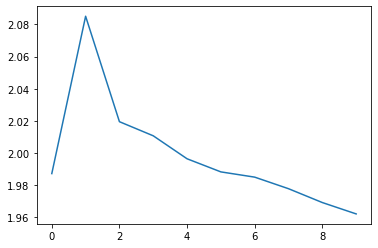

In [212]:
plt.plot(variances)

In [ ]:
import numpy as np
import sklearn.datasets, sklearn.decomposition

X = sklearn.datasets.load_iris().data
mu = np.mean(X, axis=0)

pca = sklearn.decomposition.PCA()
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

In [ ]:
correlation_matrix =asv_vs_biomarker_df.corr()
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features


In [34]:
asv_vs_biomarker_df

,527_A,550_A,576_A,597_A,625_A,646_A,684_A,733_A,512_C,542_C,...,523_G,548_G,581_G,607_G,630_G,668_G,725_G,750_G,456_gap,1792_gap
527_A,1.000000,0.057019,-0.017789,0.007403,-0.019251,0.070564,0.083579,0.004493,0.027712,0.008183,...,0.163044,0.153076,0.010689,0.029907,0.255325,0.259381,0.070267,0.006536,-0.001861,0.229022
550_A,0.057019,1.000000,-0.114993,-0.014617,-0.040650,0.294887,0.061484,-0.071082,-0.180773,-0.185714,...,0.208185,0.069857,-0.196612,-0.104331,0.227221,0.072398,0.018897,-0.098237,0.003842,0.019189
576_A,-0.017789,-0.114993,1.000000,-0.002946,0.201972,-0.152702,-0.024750,0.011155,0.034275,-0.005753,...,-0.043137,-0.044055,0.132282,-0.024538,0.021815,-0.002980,-0.042699,-0.013744,0.003914,0.001750
597_A,0.007403,-0.014617,-0.002946,1.000000,0.064202,-0.020814,-0.058062,0.012088,0.131898,-0.004863,...,0.015044,-0.212244,-0.005978,0.026062,0.002297,-0.004504,-0.034847,0.060142,0.003792,0.001695
625_A,-0.019251,-0.040650,0.201972,0.064202,1.000000,-0.082739,-0.047111,0.012482,0.091325,0.031399,...,-0.099785,-0.095338,0.071431,-0.016081,0.011319,-0.041386,-0.070305,0.016619,0.003743,0.001673
646_A,0.070564,0.294887,-0.152702,-0.020814,-0.082739,1.000000,0.529063,-0.063564,-0.101467,-0.164836,...,0.135738,-0.010824,-0.095777,-0.017410,0.196665,0.143379,0.143043,-0.094747,0.001317,0.017658
684_A,0.083579,0.061484,-0.024750,-0.058062,-0.047111,0.529063,1.000000,0.038527,-0.285093,0.000654,...,0.094382,0.013515,0.029488,0.008154,-0.060342,0.139190,0.181158,0.002915,-0.007193,0.020716
733_A,0.004493,-0.071082,0.011155,0.012088,0.012482,-0.063564,0.038527,1.000000,-0.040071,-0.010119,...,0.013607,0.013346,-0.013577,-0.017618,0.012828,0.013553,0.058734,-0.008082,0.002302,0.001029
512_C,0.027712,-0.180773,0.034275,0.131898,0.091325,-0.101467,-0.285093,-0.040071,1.000000,0.198056,...,-0.403813,-0.227579,0.088730,0.041545,0.113087,-0.172428,0.156478,-0.043837,0.021167,0.009462
542_C,0.008183,-0.185714,-0.005753,-0.004863,0.031399,-0.164836,0.000654,-0.010119,0.198056,1.000000,...,-0.433682,-0.051465,0.146247,-0.063776,0.014816,0.016568,0.087537,-0.014722,0.004192,0.001874


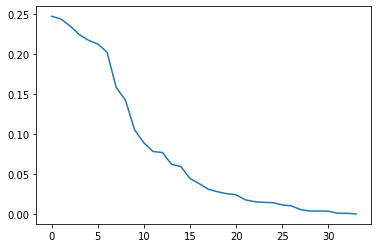

In [23]:
plt.plot(sorted(np.var(asv_vs_biomarker_df))[::-1])

# Checked.

In [11]:
with open (biomarker_names_file) as f:
    biomarker_names = [l.replace('\n', '') for l in f.readlines()]
    
with open (biomarker_names_file.replace('sbb3', 'sbb1')) as f:
    biomarker_names_sbb1 = [l.replace('\n', '') for l in f.readlines()]

sample_vs_biomarker  = scipy.sparse.load_npz(sample_vs_biomarker_file)
asv_vs_biomarker  = scipy.sparse.load_npz(asv_vs_biomarker_file)
asv_vs_biomarker_sbb1  = scipy.sparse.load_npz(asv_vs_biomarker_sbb1_file)
sample_vs_asv = pd.read_table(sample_vs_asv_file)
seqs_aligned = [r for r in SeqIO.parse(seqs_aligned_file, 'fasta')][:-1]

asv_vs_biomarker_df = pd.DataFrame(asv_vs_biomarker.todense())
asv_vs_biomarker_df.columns = biomarker_names


In [272]:
asv_vs_biomarker_df[:10]

,527_A\t550_A\t576_A\t0\t1\t2,527_A\t550_A\t597_A\t0\t1\t3,527_A\t550_A\t625_A\t0\t1\t4,527_A\t550_A\t646_A\t0\t1\t5,527_A\t550_A\t684_A\t0\t1\t6,527_A\t550_A\t733_A\t0\t1\t7,527_A\t550_A\t512_C\t0\t1\t8,527_A\t550_A\t542_C\t0\t1\t9,527_A\t550_A\t572_C\t0\t1\t10,527_A\t550_A\t596_C\t0\t1\t11,...,668_G\t725_G\t750_G\t29\t30\t31,668_G\t725_G\t456_gap\t29\t30\t32,668_G\t725_G\t1792_gap\t29\t30\t33,668_G\t750_G\t456_gap\t29\t31\t32,668_G\t750_G\t1792_gap\t29\t31\t33,668_G\t456_gap\t1792_gap\t29\t32\t33,725_G\t750_G\t456_gap\t30\t31\t32,725_G\t750_G\t1792_gap\t30\t31\t33,725_G\t456_gap\t1792_gap\t30\t32\t33,750_G\t456_gap\t1792_gap\t31\t32\t33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [273]:
[(s[527]=='A')&(s[550]=='A')&(s[646]=='A') for s in seqs_aligned[:10]]

[False, False, False, False, True, True, True, False, False, False]